In [1]:
import os

# 获取当前工作目录
current_directory = os.getcwd()
print(f"Current directory before change: {current_directory}")

# 要更改的目标目录
target_directory = 'NLP-Tutorial-How-to-be-Shakesapeare/Its-a-Long-Story'

# 更改当前工作目录
os.chdir(target_directory)

# 获取更改后的当前工作目录地址
new_directory = os.getcwd()
print(f"Current directory after change: {new_directory}")


Current directory before change: /teamspace/studios/this_studio
Current directory after change: /teamspace/studios/this_studio/NLP-Tutorial-How-to-be-Shakesapeare/Its-a-Long-Story


In [4]:
from datasets import load_dataset

# 加载CNN/DailyMail数据集
dataset = load_dataset('cnn_dailymail', '3.0.0')

# 查看数据集的字段
print(dataset['train'].column_names)
print(dataset['validation'].column_names)
print(dataset['test'].column_names)


['article', 'highlights', 'id']
['article', 'highlights', 'id']
['article', 'highlights', 'id']


In [ ]:
# 查看训练集中的前5个样本
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"Article: {train_dataset[i]['article'][:500]}...")  # 只展示前500个字符
    print(f"Summary: {train_dataset[i]['highlights']}\n")


Sample 1:
Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as s...
Summary: Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .

Sample 2:
Article: Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are m

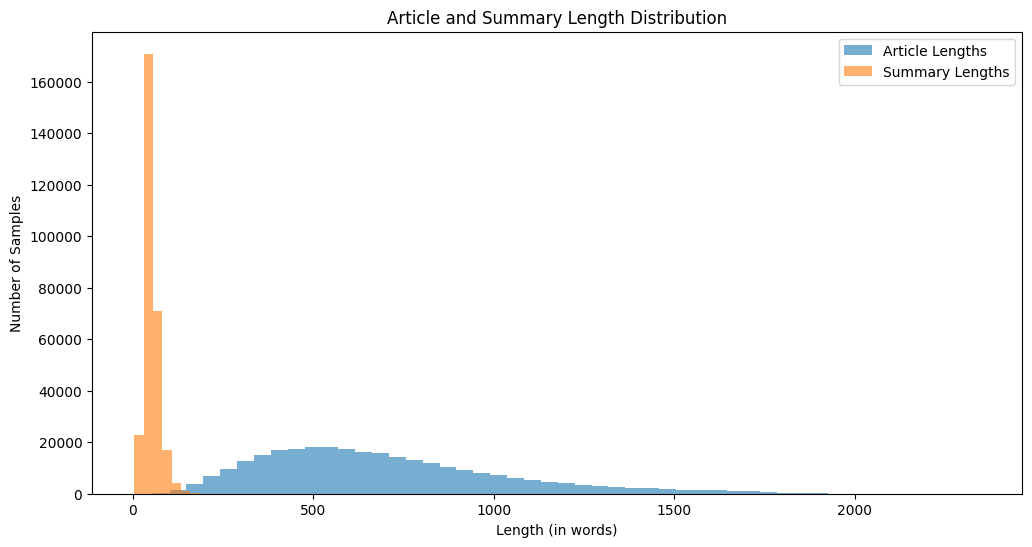

In [ ]:
import matplotlib.pyplot as plt

# 计算文章和摘要的长度
article_lengths = [len(article.split()) for article in train_dataset['article']]
summary_lengths = [len(summary.split()) for summary in train_dataset['highlights']]

# 绘制长度分布图
plt.figure(figsize=(12, 6))
plt.hist(article_lengths, bins=50, alpha=0.6, label='Article Lengths')
plt.hist(summary_lengths, bins=50, alpha=0.6, label='Summary Lengths')
plt.xlabel('Length (in words)')
plt.ylabel('Number of Samples')
plt.legend(loc='upper right')
plt.title('Article and Summary Length Distribution')
plt.show()


In [ ]:
import numpy as np

# 计算统计信息
article_mean_length = np.mean(article_lengths)
article_max_length = np.max(article_lengths)
article_min_length = np.min(article_lengths)

summary_mean_length = np.mean(summary_lengths)
summary_max_length = np.max(summary_lengths)
summary_min_length = np.min(summary_lengths)

print(f"Article Length - Mean: {article_mean_length}, Max: {article_max_length}, Min: {article_min_length}")
print(f"Summary Length - Mean: {summary_mean_length}, Max: {summary_max_length}, Min: {summary_min_length}")


Article Length - Mean: 691.8703263175126, Max: 2347, Min: 8
Summary Length - Mean: 51.574101486174435, Max: 1296, Min: 4


Shortest Article (Length: 8):
Downton Abbey's famously grim butler, Mr Bates .

Longest Article (Length: 2347):
Taylor Swift has won hundreds of awards, but she'll likely never forget her 2009 Best Female Video at the MTV Video Music Awards. Rapper Kanye West rushed the stage, stealing the microphone from the unsuspecting singer and insisting fellow nominee Beyonce had 'one of the best videos of all time.' However, six years later the two seemed chummy as they posed backstage at the 57th Grammy Awards in Los Angeles. Scroll down for video . Reconciled: It looks like all is good between Kanye West (L) and Taylor Swift (R) after the former infamously interrupted the singer's MTV VMA acceptance speech . Bad Blood: Taylor was taken by surprise when Kanye rushed the stage back in 2009 when she won Best Female Video . In one shot, the unlikely duo appear to be engaged in a handshake, as they both sport wide grins, which is also unusual for Kanye. The pair were also spotted posing together, s

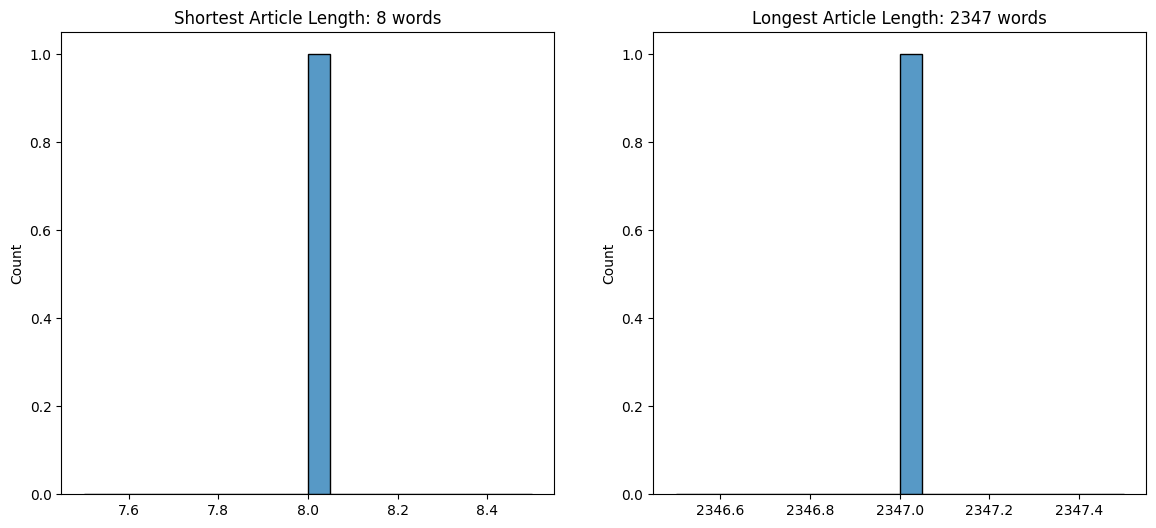

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算所有文章的长度
articles_length = [len(article.split()) for article in dataset['train']['article']]

# 查找最短和最长的样本
min_length_idx = articles_length.index(min(articles_length))
max_length_idx = articles_length.index(max(articles_length))

shortest_article = dataset['train'][min_length_idx]['article']
longest_article = dataset['train'][max_length_idx]['article']

# 打印最短和最长的文章
print(f"Shortest Article (Length: {articles_length[min_length_idx]}):\n{shortest_article}\n")
print(f"Longest Article (Length: {articles_length[max_length_idx]}):\n{longest_article}\n")

# 可视化最短和最长文章的长度
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot([len(shortest_article.split())], kde=False, bins=20)
plt.title(f"Shortest Article Length: {len(shortest_article.split())} words")

plt.subplot(1, 2, 2)
sns.histplot([len(longest_article.split())], kde=False, bins=20)
plt.title(f"Longest Article Length: {len(longest_article.split())} words")

plt.show()


In [ ]:
# 检查是否有缺失值
missing_articles = sum([1 for article in train_dataset['article'] if article.strip() == ''])
missing_summaries = sum([1 for summary in train_dataset['highlights'] if summary.strip() == ''])

print(f"Missing articles in train set: {missing_articles}")
print(f"Missing summaries in train set: {missing_summaries}")


Missing articles in train set: 0
Missing summaries in train set: 0


In [5]:
train_dataset = dataset['train']
valid_dataset = dataset['validation']
test_dataset = dataset['test']

In [6]:
import numpy as np
import pandas as pd

# 计算文章的长度
train_lengths = [len(article.split()) for article in train_dataset['article']]
valid_lengths = [len(article.split()) for article in valid_dataset['article']]
test_lengths = [len(article.split()) for article in test_dataset['article']]

# 将长度转换为DataFrame以便处理
train_df = pd.DataFrame({'article': train_dataset['article'], 'length': train_lengths})
valid_df = pd.DataFrame({'article': valid_dataset['article'], 'length': valid_lengths})
test_df = pd.DataFrame({'article': test_dataset['article'], 'length': test_lengths})

# 计算IQR
def filter_outliers(df):
    Q1 = df['length'].quantile(0.25)
    Q3 = df['length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 过滤掉异常短或异常长的样本
    filtered_df = df[(df['length'] >= lower_bound) & (df['length'] <= upper_bound)]
    return filtered_df

# 过滤异常值
filtered_train_df = filter_outliers(train_df)
filtered_valid_df = filter_outliers(valid_df)
filtered_test_df = filter_outliers(test_df)

# 显示过滤前后的数据数量
print(f"Train Dataset: Original {len(train_df)}, Filtered {len(filtered_train_df)}")
print(f"Validation Dataset: Original {len(valid_df)}, Filtered {len(filtered_valid_df)}")
print(f"Test Dataset: Original {len(test_df)}, Filtered {len(filtered_test_df)}")

# 更新原始数据集，移除异常值
train_dataset = train_dataset.select(filtered_train_df.index.tolist())
valid_dataset = valid_dataset.select(filtered_valid_df.index.tolist())
test_dataset = test_dataset.select(filtered_test_df.index.tolist())


Train Dataset: Original 287113, Filtered 279930
Validation Dataset: Original 13368, Filtered 13073
Test Dataset: Original 11490, Filtered 11220


In [7]:
from datasets import DatasetDict

# 创建处理后的 DatasetDict 对象
filtered_dataset = DatasetDict({
    'train': train_dataset,
    'validation': valid_dataset,
    'test': test_dataset
})

# 保存处理后的数据集
filtered_dataset.save_to_disk('filtered_dataset')

print("Filtered dataset saved to 'filtered_dataset' directory.")


Saving the dataset (0/3 shards):   0%|          | 0/279930 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/13073 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/11220 [00:00<?, ? examples/s]

Filtered dataset saved to 'filtered_dataset' directory.
